# 1. Binomial and Gaussian Distributions

Basically, this problem is a repeat of a previous problem (in HW1). The goal of this problem is to show how a Gaussian distribution is a good approximation of a Poisson or binomial distribution at high expected counts ($\lambda$ or $\mu$). Furthermore, a Gaussian distribution is continuous whereas the Poisson and binomial distributions can be difficult to evaluate via computer at high $n$. 

In this problem, a well-established count rate of photons from a star (from a given telescope) is 0.1/s. The photons from a star are counted for 100 seconds by a "perfect" CCD that is read out every 1 second (1 second accumulation).

## Part (a) 
Start with the binomial distribution. Write a program that calculates $P(x;n,p)$ as a function of $x$ with $n=100$ and $p=0.1$. Plot your results for $0 \le x \le 20$.

### Jasmine's reminder to self

**Binomial probability:**

\begin{align*}
P_B(x;n,p) &= \frac{n!}{(n-x)!x!}p^x q^{n-x}
\end{align*}

where, $q=1-p$

And other useful:

\begin{align*}
&E(x) = \mu \\
&E(x-\mu)^2 = \sigma^2
\end{align*}

where, $E(f(x)) = \sum f(x)P(x)$

In [1]:
# libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class a_binomial:
    def __init__(self, x_min=0,x_max=15, n=100, p=0.035):
        self.x = np.arange(x_min,x_max+1,1)
        self.n = n
        self.p = p
        self.q = 1-self.p

    # function to calculate probability P(x;n,p)
    def P_binomial(self,x,n,p,q):                             
        numerator = math.factorial(n)                           # fraction numerator: n!
        denominator = math.factorial(n-x)*math.factorial(x)     # fraction denominator: (n-x)!x!
        fraction = numerator/denominator
        px = p**x                                               # p^x
        qnx = q**(n-x)                                          # q^(n-x) = (1-p)^(n-x)
        return fraction*px*qnx                                  # [n!/((n-x)!x!)]*(p^x)*(q*(n-x))

    def Expectation(self,fx,Px):
        E = sum(fx*Px)              # E(x) = sum(f(x)*P(x))
        return E
    
    def calculate_everything(self,x,Px):
        # calculate mean: mu = E(x)
        self.mu = self.Expectation(fx=self.x,Px=self.Px)   

        # calculate stand. dev: sigma = sqrt(sigma^2); sigma^2 = E(x-mu)^2
        self.sigma = np.sqrt(self.Expectation(fx=(self.x-self.mu)**2,Px=self.Px)) 

        # calculate mode: x value where P(x) is highest
        self.mode = self.x[np.argmax(self.Px)]

    
    def plot_binomial(self,title="Binomial Distribution",label="Binomial",color='black'):
        self.Px = [self.P_binomial(x= i,n=self.n,p=self.p,q=self.q) for i in self.x]
        plt.plot(self.x,self.Px, label=label,c=color)
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("P(x)")

    def plot_mark_mean(self,colors= 'green',linestyles='dashdot',label = "Mean: "):
        # mark mean in plot
        plt.vlines(self.mu,ymax=max(self.Px),ymin=0,
                   linestyles=linestyles,
                   colors=colors,
                   label=label + "$\mu$ = {0:.3f}".format(self.mu))
        plt.legend()

    def plot_mark_mode(self,colors='blue',linestyles='solid',label='Most Likely Value: '):
        # mark mode in plot
        plt.vlines(self.mode,ymax=max(self.Px),ymin=0,
                   linestyles=linestyles,
                   colors=colors,
                   label=label+ "mode = {0:.3f}".format(self.mode))
        plt.legend()

    def plot_mark_std(self,colors='orange',linestyles='dotted',label="Standard deviation: "):
        # mark standard deviation (wrt mean) in plot
        plt.vlines(self.mu+self.sigma,ymax=max(self.Px),ymin=0,
                   colors=colors,
                   linestyles=linestyles,
                   label=label + "$\sigma$ = {0:.3f}".format(self.sigma))
        plt.vlines(self.mu-self.sigma,
                   ymax=max(self.Px),
                   ymin=0,colors=colors,
                   linestyles=linestyles)
        plt.legend()

    def complete_ind_binomial_plot(self,title="Binomial Distribution"):
        self.plot_binomial(title=title,label=None)
        self.calculate_everything(x=self.x,Px=self.Px)
        self.plot_mark_mean()
        self.plot_mark_mode()
        self.plot_mark_std()

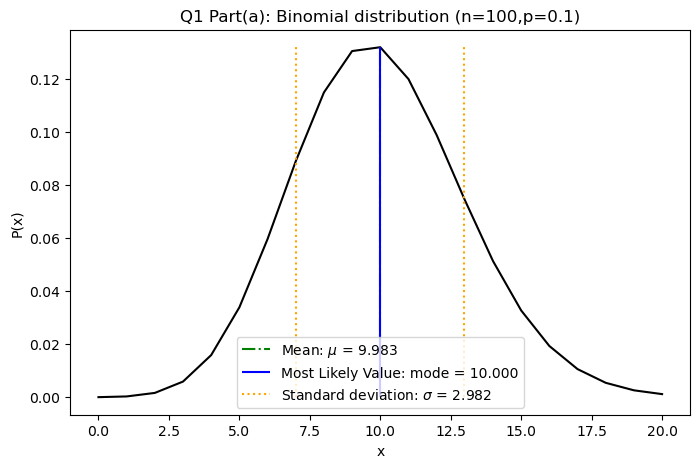

In [3]:
part_a = a_binomial(x_min=0,x_max=20,n=100,p=0.1)
plt.figure(figsize=(8,5))
part_a.complete_ind_binomial_plot(title="Q1 Part(a): Binomial distribution (n={},p={})".format(part_a.n,part_a.p))

## Part (b)

Overplot the Poisson distribution; use a different color or line style to distinguish the two. What is the mean and sigma?

### Jasmine's reminder to self

**Poisson probability:**

\begin{align*}
P_B(x;\lambda) &= \frac{\lambda^x}{x!}e^{-\lambda}
\end{align*}

In [4]:
class b_poisson(a_binomial):
    def __init__(self, x_min=0,x_max=15, lmd=3.5):              
        self.x = np.arange(x_min,x_max+1,1)
        self.lmd = lmd                          # the term "lambda" has its own purpose in python so I named the variable "lmd" instead

    # function to calculate probability P(x;lambda)
    def P_poisson(self,x,lmd):                             
        numerator = lmd**x                          # fraction numerator: lambda^x
        denominator = math.factorial(x)             # fraction denominator: x!
        fraction = numerator/denominator
        e_lmd = math.exp(-lmd)                      # e^(-lambda)
        return fraction*e_lmd                       # [(mu^x)/(x!)]*(e^(-lambda))
    
    def plot_poisson(self,title="Poisson Distribution",label="Poisson",color='purple'):
        self.Px = [self.P_poisson(x= i,lmd=self.lmd) for i in self.x]
        
        plt.plot(self.x,self.Px, label=label,c=color)
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("P(x)")

    def complete_ind_poisson_plot(self,title="Poisson Distribution"):
        self.plot_poisson(title=title,label=None)
        self.calculate_everything(x=self.x,Px=self.Px)
        self.plot_mark_mean()
        self.plot_mark_mode()
        self.plot_mark_std()

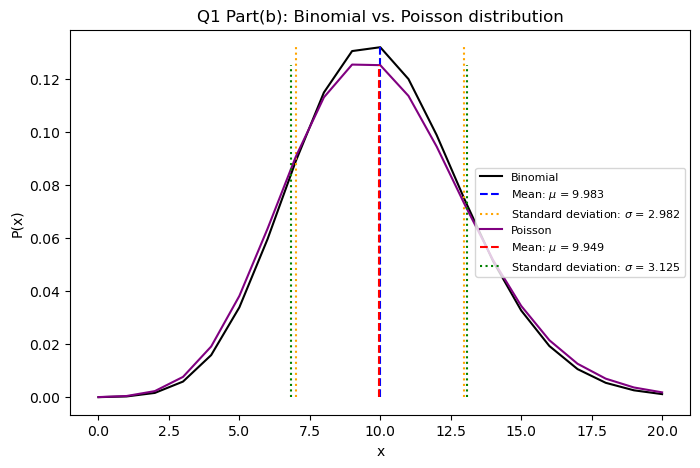

In [5]:
part_b = b_poisson(lmd=part_a.mu,x_max=20)  #instantiation

# comparison plot between Binomial and Poisson
plt.figure(1,figsize=(8,5))
#Binomial
part_a.plot_binomial(label="Binomial")
part_a.plot_mark_mean(colors='Blue',linestyles='dashed')
part_a.plot_mark_std(colors="orange")
#Poisson
part_b.plot_poisson(title="Q1 Part(b): Binomial vs. Poisson distribution")
part_b.calculate_everything(x=part_b.x,Px=part_b.Px)
part_b.plot_mark_mean(colors='red',linestyles='dashed')
part_b.plot_mark_std(colors="green")
plt.legend(loc='center right',fontsize=8)

## Part (c)

Overplot the Gaussian distribution using a fine x-axis. How close are the two functions? Do they peak at the same value? Is it reasonable to assume a Gaussian parent distribution in this case?

### Jasmine's reminder to self

**Gaussian probability:**

\begin{align*}
P_G(x;\lambda, \sigma) &= \frac{1}{\sigma \sqrt{2 \pi}}\exp\left({\frac{-(x-\lambda)^2}{2\sigma^2}}\right)
\end{align*}

In [6]:
class c_gaussian(b_poisson):
    def __init__(self,lmd,sigma, x_min=0,x_max=15):
        self.lmd = lmd
        self.sigma = sigma
        self.x = np.arange(x_min,x_max+1,1)

    def P_Gaussian(self,x):
        power = -((x-self.lmd)**2)/(2*(self.sigma**2))         #-(x-<x>)^2/2(sigma^2)
        denominator = self.sigma*np.sqrt(2*np.pi)               # sigma*squareroot(2*pi)
        return (1/denominator)*np.exp(power)
    
    def plot_gaussian(self,title = 'Gaussian Distribution',label='Gaussian',color = "green"):
        self.Px = [self.P_Gaussian(x=i) for i in self.x]

        plt.plot(self.x,self.Px, label=label,c=color)
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("P(x)")

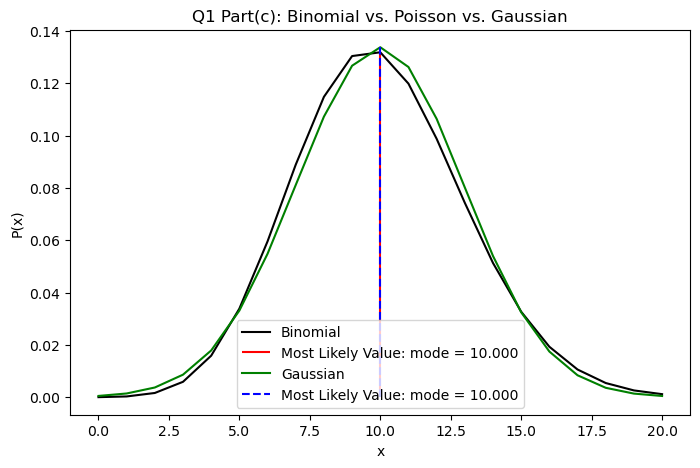

In [7]:
part_c = c_gaussian(lmd=part_a.mu,sigma=part_a.sigma,x_max=20)  #instantiation

# comparison plot between Binomial and Poisson
plt.figure(1,figsize=(8,5))

#Binomial
part_a.plot_binomial(label="Binomial")
# part_a.plot_mark_mean(colors='Blue',linestyles='dashed')
# part_a.plot_mark_std(colors="orange")
part_a.plot_mark_mode(colors='red')

# #Poisson
# part_b.plot_poisson(label='Poisson')
# part_b.calculate_everything(x=part_b.x,Px=part_b.Px)
# # part_b.plot_mark_mean(colors='red',linestyles='dashed')
# # part_b.plot_mark_std(colors="green")

#Gaussian
part_c.plot_gaussian(title="Q1 Part(c): Binomial vs. Poisson vs. Gaussian")
part_c.calculate_everything(x=part_c.x,Px=part_c.Px)
# part_c.plot_mark_mean(colors='lime',linestyles='dashed')
# part_c.plot_mark_std(colors = 'cyan')
part_c.plot_mark_mode(linestyles='dashed')
plt.legend()

# 2. How Old is This Volcano?

The age of a volcanic eruption on Mars can be inferred from counting the surface density of craters of a given diameter or greater. It is established that the impact rate $r=0.01$ craters $\text{km}^{-2}\text{Myr}^{-1}$. You survey an area ($A$) of 10 $\text{km}^2$ and find 3 craters ($x$).

## Part (a)
Start by making a simple estimate of the volcano's age and a standard deviation.

### Jasmine's written answer
#### Simple estimate of age
We have 
- established impact rate: $r=0.01 \frac{\text{craters}}{\text{km}^2\text{Myr}}$
- number of craters observed: $x=3 \text{ craters}$
- survey area: $A = 10 \text{ km}^2$

And let's call the simple estimate of age, $y$.

Therefore,

\begin{align*}
r &= \frac{x}{A * y} \\
\Rightarrow y &= \frac{x}{A * r}
\end{align*}

Plug in numbers:

\begin{align*}
y &= \frac{x}{A * r} \\
&= \frac{3}{(10)(0.01)} \\
\end{align*}

In [8]:
#approx age
x = 3
r = 0.01
A = 10

age = x/(A*r)
print("Simple estimate of age:",age,"Myr")

Simple estimate of age: 30.0 Myr


\begin{align*}
y &= \frac{x}{A * r} \\
&= \frac{3}{(10)(0.01)} \\
\end{align*}

$$\boxed{y = 30 \text{ Myr}}$$

#### Standard deviation

If we have a variable that is function derived from multiple other variables, i.e. $X = f(U,V,\dots)$, then the standard deviation for that value, $\sigma_X^2$ is as follows:

\begin{align*}
\sigma_X^2 = \sigma_U^2 \left(\frac{\partial X}{\partial U} \right)^2 + \sigma_V^2 \left(\frac{\partial X}{\partial V} \right)^2 + \cdots + 2\sigma_{UV} \left(\frac{\partial X}{\partial U} \right)\left(\frac{\partial X}{\partial V} \right) + \cdots
\end{align*}

## Part (b)

The simple estimation of the age and uncertainty is often adequate. One can explore this problem further by calculating the *posterior* probability, $P(x;t)$ over a range of times (say, $t=0$ to 150 in Myr intervals) assuming a Poisson parent distribution and knowing $x=3$. Do this problem on your computer. 

Important point: the initial calculation yields a set of *relative* probabilities; under Bayes' law: 
$$P(t;x) = \frac{P(x;t)P(t)}{P(x)}$$

Since we have no prior knowledge in this case, we treat $P(t)/P(x)$ as a constant; You must normalize $P(t;x)$ so that the total probability is 1. $P(t;x)$ will have units of "probability/Myr". Plot your results. Mark the mean and mode (most likely age) and directly compute the standard deviation. Compare these values with your simple estimate.

## Part (c)

A low count rate creates two issues. One issue is, of course, that the standard deviation is large regardless of how it is calculated. The other issue is that the probability distributions are often not symmetric, which creates a bit of a conundrum. It is natural to choose the most likely value of $P(t;x)$ as the age of the volcano but one can see that there is a greater probability that the volcano is older than the likely age rather than younger (if your plot is correct at this point). So how does one determine the uncertainty?

There are several methods that can assign the uncertainty, one of which (relatively easy) is to calculate the full width at half the maximum (*FWHM*) of $P(t;x)$ and apply the Gaussian formula that $\text{FWHM} = \sigma \sqrt{8ln(2)}$ to calculate $\sigma$. What does the does this method yield $[t_{min},t_{max}]$? You now have calculated sigma three times. Is there a significant difference between them? (More to come on this!)

## Part (d)

Now suppose that 34 impact craters are identified over a 100 $\text{km}^2$ area. Redo parts (a), (b), and (c). Plot your results and compare.

# 3. Random Walk and the Central Limit Theorem

## Part (a)

The random walk is often used to eludicate the central limit theorem. Using a classical but perhaps no longer politically correct analogy, a drunk at a lamp post ($x=0$) takes a step either to the left or to the right with equal probability. His/her position ($x$) after $n$ steps, can be represented with the binomial distribution:

$$P_B(x;n,p) = \frac{n!}{(n-x)!x!} p^{x+1}q^{n-x}$$

Set $p=1/2$ for a step to the right (positive) of one unit, otherwise the step is to the left. The distance traveled is the $d=2x-n$. We know from the central limit theorem that $P_B(d;n,p)$ approaches a Gaussian at large $n$. Numerically calculate and plot $P_B(d;n,p)$ for $n=100$. 

Overplot: $$P_G(d) = \frac{C}{\sigma \sqrt{2\pi}} e^{-\frac{d^2}{2\sigma ^2}}$$

Careful with normalization! $P_B(d;n,p)$ is normalized so that its total is 1. When using $d=2x-n$ with $n$ as an even number, $d$ must be an even number. There are only 101 possible positions. On the other hand, $P_G(d)$ does not require $d$ to be even (or an integer for that matter) and has twice as many possible positions. 

I recommend that the plot is log/linear with the vertical axis (probability) range of $10^{-5}$ to $1$. Don't print it out yet. See below.

In [18]:
class rand_walk():
    def __init__(self,n=100,p=0.5,):
        self.n = n          #number of steps
        self.p = p          #probability of right (positive) step
        self.q = 1-p        #probability of left step

        self.x = np.arange(0,self.n+1,1)
        self.d = self.distance(x=self.x,n=self.n)
    
    def distance(self,x,n):     # d
        d = 2*x -n
        return d
    
    # function to calculate binomial probability P(x;n,p) (probability of final position x)
    def P_Binomial(self,x,n,p,q):                             
        numerator = math.factorial(n)                           # fraction numerator: n!
        denominator = math.factorial(n-x)*math.factorial(x)     # fraction denominator: (n-x)!x!
        fraction = numerator/denominator
        px = p**x                                               # p^x
        qnx = q**(n-x)                                          # q^(n-x) = (1-p)^(n-x)
        return fraction*px*qnx                                  # [n!/((n-x)!x!)]*(p^x)*(q*(n-x))
    
    def get_mu_sig(self):
        self.mu = np.sum(self.x)/self.n
        # self.sigma = np.sqrt(np.sum((self.mu - self.x))**2/self.n)  #sigma from 2/5/2024 notes
        # self.sigma = np.sqrt(4*self.p*self.q*self.n)              #"exact" sigma from PHYS220
        self.sigma = np.sqrt(self.n)
        return
    
    # def Expectation(self,fx,Px):
    #     E = sum(fx*Px)              # E(x) = sum(f(x)*P(x))
    #     return E
    
    # def calculate_everything(self,x,Px):
    #     # calculate mean: mu = E(x)
    #     self.mu = self.Expectation(fx=x,Px=Px)   

    #     # calculate stand. dev: sigma = sqrt(sigma^2); sigma^2 = E(x-mu)^2
    #     self.sigma = np.sqrt(self.Expectation(fx=(x-self.mu)**2,Px=Px)) 

    #     # calculate mode: x value where P(x) is highest
    #     self.mode = self.x[np.argmax(Px)]

    def P_Gaussian(self,x):
        self.get_mu_sig()
        # self.calculate_everything(x=self.x,Px=self.Pb)

        power = -(x-self.mu)**2/(2*(self.sigma**2))         
        denominator = self.sigma*np.sqrt(2*np.pi)               
        return (1/denominator)*np.exp(power)    

    def Q3_plot(self):
        self.Pb = [self.P_Binomial(x=i,n=self.n,p=self.p,q=self.q) for i in self.x]
        self.Pg = [self.P_Gaussian(x=i) for i in self.x]

        plt.figure()
        plt.plot(self.d,self.Pb,label = 'Binomial')
        plt.plot(self.d,self.Pg,'--', label = 'Gaussian')
        plt.xlabel('d')
        plt.ylabel('P(d)')
        plt.title('Q3.a: Binomial and Gaussian')
        plt.legend()
        plt.show()

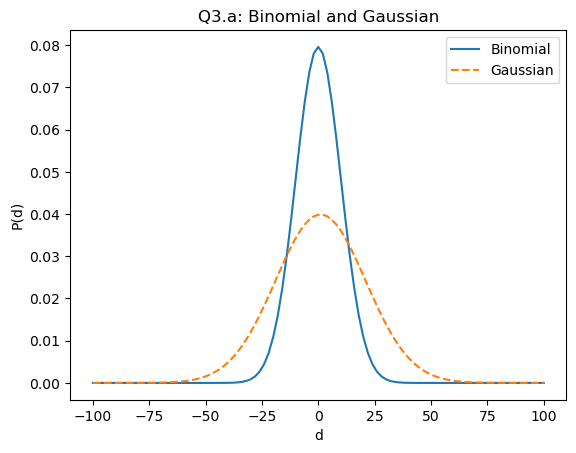

In [19]:
n = 100
p = 0.5 

rw = rand_walk(n=n,p=p)
rw.Q3_plot()

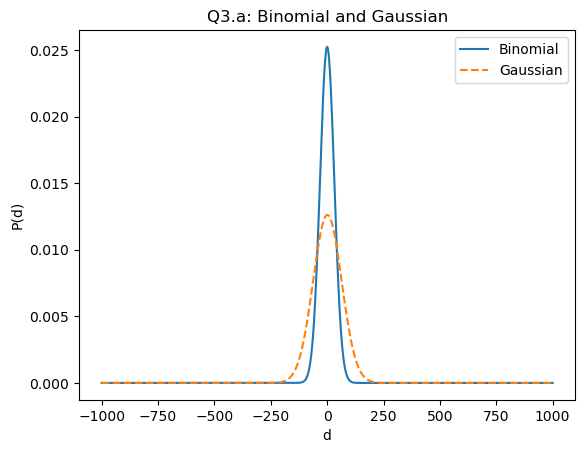

In [20]:
n = 1000
p = 0.5 

rw = rand_walk(n=n,p=p)
rw.Q3_plot()

## Part (b)

What if, however, the lamppost ($x=0$) is at the bottom of a parabolic valley as pictured below. Let the altitude be $z=0.005 d^2$, so that the $\text{slope} = 0.01 d$. Now suppose the drunk tends to stagger downhill. Let the probability of a right step be $0.5-\text{slope}$. With a brute force algorithm, calculate $P(d)$. Overplot your results. What is $\sigma$?

![valley](Capture.PNG)

Hint: Implement a random walk program with $n=100$ steps by calling a uniform random number then comparing to the right-step probability, which is a function of position. Record the end position. Loop ~100,000 times and make a histogram of the end positions.

## Part (c)

Now put the lamppost ($x=0$) at the top of a parabolic hill so that the $\text{slope}= -0.01 d$. Overplot your results. What is $\sigma$?

Note: You will notice that your results look Gaussian. However, the central limit theory does **not** necessarily apply for steps (b) and (c). Save your code for the next problem when we look at power-law tails. 

# 4. Not so Random Walk: Power Law

In this problem, we repeat problem 3 with a new caveat. His/her step size is 0.50 (whatever units) but increases with absolute value of his/her current position: 
$$\text{Step} = 0.5 + |x| * 0.025$$

Let the number of steps be $n=400$ (half the original step size, so four times the number of steps). Implement a random walk program with $n=400$ steps by calling a uniform random number then comparing to the right-step probability, in this case 1/2. Record the end position. Loop ~100,000 times and make a histogram of the end positions.

Calculate $\sigma$. The mean should be zero. Overplot a Gaussian with the calculated $\sigma$. Is the resulting distribution a Gaussian?